In [1]:
# Dependencies
import matplotlib.pyplot as plt
#import requests
#from scipy import stats
import pandas as pd
#from config import api_key
#from pprint import pprint
import numpy as np
#api_key="8a1c952c0a44d3c97bbade3e6f66ae8425926b24"

In [2]:
# Save config information.
#url = "http://api.census.gov/data/2021/acs/acs1/subject?get=group(S2201)&for=us:1&key=api_key"


# Build partial query URL
#query_url = f"{url}appid={api_key}&units={units}&q="

In [3]:
df = pd.read_csv("ACSST1Y2021/Data.csv")
df.columns

Index(['GEO_ID', 'NAME', 'S2201_C01_001E', 'S2201_C01_001M', 'S2201_C01_001MA',
       'S2201_C01_001EA', 'S2201_C01_002E', 'S2201_C01_002M',
       'S2201_C01_002MA', 'S2201_C01_002EA',
       ...
       'S2201_C06_036EA', 'S2201_C06_037E', 'S2201_C06_037M',
       'S2201_C06_037MA', 'S2201_C06_037EA', 'S2201_C06_038E',
       'S2201_C06_038M', 'S2201_C06_038MA', 'S2201_C06_038EA', 'Unnamed: 914'],
      dtype='object', length=915)

In [4]:
df=df[["GEO_ID", 'NAME',"S2201_C01_036E","S2201_C03_036E"]].dropna()

In [5]:
#set first row as column names
df.columns = df.iloc[0]

df

,Geography,Geographic Area Name,Estimate!!Total!!WORK STATUS!!Families!!No workers in past 12 months,Estimate!!Households receiving food stamps/SNAP!!WORK STATUS!!Families!!No workers in past 12 months
0,Geography,Geographic Area Name,Estimate!!Total!!WORK STATUS!!Families!!No wor...,Estimate!!Households receiving food stamps/SNA...
1,0400000US01,Alabama,240399,50137
2,0400000US02,Alaska,21171,3561
3,0400000US04,Arizona,350311,44726
4,0400000US05,Arkansas,146693,22542
...,...,...,...,...
889,0500000US72113,"Ponce Municipio, Puerto Rico",11656,7624
890,0500000US72127,"San Juan Municipio, Puerto Rico",23670,13701
891,0500000US72135,"Toa Alta Municipio, Puerto Rico",4018,1856
892,0500000US72137,"Toa Baja Municipio, Puerto Rico",4295,2243


In [6]:
df=df.drop(df.index[0])
df

,Geography,Geographic Area Name,Estimate!!Total!!WORK STATUS!!Families!!No workers in past 12 months,Estimate!!Households receiving food stamps/SNAP!!WORK STATUS!!Families!!No workers in past 12 months
1,0400000US01,Alabama,240399,50137
2,0400000US02,Alaska,21171,3561
3,0400000US04,Arizona,350311,44726
4,0400000US05,Arkansas,146693,22542
5,0400000US06,California,1263989,223274
...,...,...,...,...
889,0500000US72113,"Ponce Municipio, Puerto Rico",11656,7624
890,0500000US72127,"San Juan Municipio, Puerto Rico",23670,13701
891,0500000US72135,"Toa Alta Municipio, Puerto Rico",4018,1856
892,0500000US72137,"Toa Baja Municipio, Puerto Rico",4295,2243


In [7]:
df=df[df['Geography'].str.startswith("0500000US")]
df

,Geography,Geographic Area Name,Estimate!!Total!!WORK STATUS!!Families!!No workers in past 12 months,Estimate!!Households receiving food stamps/SNAP!!WORK STATUS!!Families!!No workers in past 12 months
53,0500000US01003,"Baldwin County, Alabama",13808,685
54,0500000US01015,"Calhoun County, Alabama",6229,1603
55,0500000US01043,"Cullman County, Alabama",N,N
56,0500000US01049,"DeKalb County, Alabama",N,N
57,0500000US01051,"Elmore County, Alabama",N,N
...,...,...,...,...
889,0500000US72113,"Ponce Municipio, Puerto Rico",11656,7624
890,0500000US72127,"San Juan Municipio, Puerto Rico",23670,13701
891,0500000US72135,"Toa Alta Municipio, Puerto Rico",4018,1856
892,0500000US72137,"Toa Baja Municipio, Puerto Rico",4295,2243


In [8]:
df[['County','State']] = df['Geographic Area Name'].str.split(',',expand=True)
df=df.reset_index()
df

/var/folders/r3/ljt9syw176jcr74xd342l8r40000gn/T/ipykernel_91435/3728746595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['County','State']] = df['Geographic Area Name'].str.split(',',expand=True)
/var/folders/r3/ljt9syw176jcr74xd342l8r40000gn/T/ipykernel_91435/3728746595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['County','State']] = df['Geographic Area Name'].str.split(',',expand=True)


,index,Geography,Geographic Area Name,Estimate!!Total!!WORK STATUS!!Families!!No workers in past 12 months,Estimate!!Households receiving food stamps/SNAP!!WORK STATUS!!Families!!No workers in past 12 months,County,State
0,53,0500000US01003,"Baldwin County, Alabama",13808,685,Baldwin County,Alabama
1,54,0500000US01015,"Calhoun County, Alabama",6229,1603,Calhoun County,Alabama
2,55,0500000US01043,"Cullman County, Alabama",N,N,Cullman County,Alabama
3,56,0500000US01049,"DeKalb County, Alabama",N,N,DeKalb County,Alabama
4,57,0500000US01051,"Elmore County, Alabama",N,N,Elmore County,Alabama
...,...,...,...,...,...,...,...
836,889,0500000US72113,"Ponce Municipio, Puerto Rico",11656,7624,Ponce Municipio,Puerto Rico
837,890,0500000US72127,"San Juan Municipio, Puerto Rico",23670,13701,San Juan Municipio,Puerto Rico
838,891,0500000US72135,"Toa Alta Municipio, Puerto Rico",4018,1856,Toa Alta Municipio,Puerto Rico
839,892,0500000US72137,"Toa Baja Municipio, Puerto Rico",4295,2243,Toa Baja Municipio,Puerto Rico


In [9]:
df.dtypes

0
index                                                                                                    int64
Geography                                                                                               object
Geographic Area Name                                                                                    object
Estimate!!Total!!WORK STATUS!!Families!!No workers in past 12 months                                    object
Estimate!!Households receiving food stamps/SNAP!!WORK STATUS!!Families!!No workers in past 12 months    object
County                                                                                                  object
State                                                                                                   object
dtype: object

In [10]:
df.columns=['original index','Geography',
            'Geographic Area Name',
            'Families with No workers in past year',
            'Families receiving food stamps/SNAP with No workers in past year',
           'County','State']

In [11]:
df

,original index,Geography,Geographic Area Name,Families with No workers in past year,Families receiving food stamps/SNAP with No workers in past year,County,State
0,53,0500000US01003,"Baldwin County, Alabama",13808,685,Baldwin County,Alabama
1,54,0500000US01015,"Calhoun County, Alabama",6229,1603,Calhoun County,Alabama
2,55,0500000US01043,"Cullman County, Alabama",N,N,Cullman County,Alabama
3,56,0500000US01049,"DeKalb County, Alabama",N,N,DeKalb County,Alabama
4,57,0500000US01051,"Elmore County, Alabama",N,N,Elmore County,Alabama
...,...,...,...,...,...,...,...
836,889,0500000US72113,"Ponce Municipio, Puerto Rico",11656,7624,Ponce Municipio,Puerto Rico
837,890,0500000US72127,"San Juan Municipio, Puerto Rico",23670,13701,San Juan Municipio,Puerto Rico
838,891,0500000US72135,"Toa Alta Municipio, Puerto Rico",4018,1856,Toa Alta Municipio,Puerto Rico
839,892,0500000US72137,"Toa Baja Municipio, Puerto Rico",4295,2243,Toa Baja Municipio,Puerto Rico


In [12]:
df1=pd.DataFrame(df,columns=['Geography','Geographic Area Name','Families with No workers in past year',
                             'Families receiving food stamps/SNAP with No workers in past year','County','State'])

df1 = df1.replace(to_replace='N', value=np.nan).dropna()

In [146]:
#df1.to_csv('df1.csv')


In [13]:
df = pd.read_csv("df1.csv")
df.dtypes

Unnamed: 0                                                           int64
Geography                                                           object
Geographic Area Name                                                object
Families with No workers in past year                                int64
Families receiving food stamps/SNAP with No workers in past year     int64
County                                                              object
State                                                               object
dtype: object

In [14]:
df['Gap']=df['Families with No workers in past year'].sub(df['Families receiving food stamps/SNAP with No workers in past year'])
df


,Unnamed: 0,Geography,Geographic Area Name,Families with No workers in past year,Families receiving food stamps/SNAP with No workers in past year,County,State,Gap
0,0,0500000US01003,"Baldwin County, Alabama",13808,685,Baldwin County,Alabama,13123
1,1,0500000US01015,"Calhoun County, Alabama",6229,1603,Calhoun County,Alabama,4626
2,5,0500000US01055,"Etowah County, Alabama",5329,688,Etowah County,Alabama,4641
3,6,0500000US01069,"Houston County, Alabama",5966,1459,Houston County,Alabama,4507
4,7,0500000US01073,"Jefferson County, Alabama",25249,6848,Jefferson County,Alabama,18401
...,...,...,...,...,...,...,...,...
605,836,0500000US72113,"Ponce Municipio, Puerto Rico",11656,7624,Ponce Municipio,Puerto Rico,4032
606,837,0500000US72127,"San Juan Municipio, Puerto Rico",23670,13701,San Juan Municipio,Puerto Rico,9969
607,838,0500000US72135,"Toa Alta Municipio, Puerto Rico",4018,1856,Toa Alta Municipio,Puerto Rico,2162
608,839,0500000US72137,"Toa Baja Municipio, Puerto Rico",4295,2243,Toa Baja Municipio,Puerto Rico,2052


In [15]:
df_cleaned=df[['Geography','Geographic Area Name','Families with No workers in past year','Families receiving food stamps/SNAP with No workers in past year','Gap','County','State']]
df_cleaned

,Geography,Geographic Area Name,Families with No workers in past year,Families receiving food stamps/SNAP with No workers in past year,Gap,County,State
0,0500000US01003,"Baldwin County, Alabama",13808,685,13123,Baldwin County,Alabama
1,0500000US01015,"Calhoun County, Alabama",6229,1603,4626,Calhoun County,Alabama
2,0500000US01055,"Etowah County, Alabama",5329,688,4641,Etowah County,Alabama
3,0500000US01069,"Houston County, Alabama",5966,1459,4507,Houston County,Alabama
4,0500000US01073,"Jefferson County, Alabama",25249,6848,18401,Jefferson County,Alabama
...,...,...,...,...,...,...,...
605,0500000US72113,"Ponce Municipio, Puerto Rico",11656,7624,4032,Ponce Municipio,Puerto Rico
606,0500000US72127,"San Juan Municipio, Puerto Rico",23670,13701,9969,San Juan Municipio,Puerto Rico
607,0500000US72135,"Toa Alta Municipio, Puerto Rico",4018,1856,2162,Toa Alta Municipio,Puerto Rico
608,0500000US72137,"Toa Baja Municipio, Puerto Rico",4295,2243,2052,Toa Baja Municipio,Puerto Rico


In [151]:
#df_cleaned.to_csv('df_cleaned.csv')

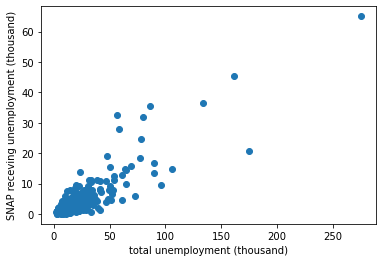

In [21]:
# Create a Scatter Plot for total unemployment vs. SNAP receving unemployment
plt.scatter(df_cleaned["Families with No workers in past year"]/1000, df_cleaned["Families receiving food stamps/SNAP with No workers in past year"]/1000)
plt.xlabel("total unemployment (thousand)")
plt.ylabel("SNAP receving unemployment (thousand)")
plt.show()

In [22]:
from scipy import stats
# Perform a linear regression on total unemployment vs. SNAP receving unemployment
(slope, yIntercept, rvalue, pvalue, sterr) = stats.linregress(df_cleaned["Families with No workers in past year"], df_cleaned["Families receiving food stamps/SNAP with No workers in past year"])

# Get regression values (list) - y = mx + b
regressValues = (df_cleaned["Families with No workers in past year"] * slope) + yIntercept
regressValues

0      2473.767255
1       820.119992
2       623.750743
3       762.736534
4      4970.056783
          ...     
605    2004.226562
606    4625.537845
607     337.706204
608     398.144295
609     229.266741
Name: Families with No workers in past year, Length: 610, dtype: float64

In [23]:
# Create line equation string - y = mx + b
lineEQ = f"y = {slope:.2f}x + {yIntercept:.2f}"
lineEQ

'y = 0.22x + -538.97'

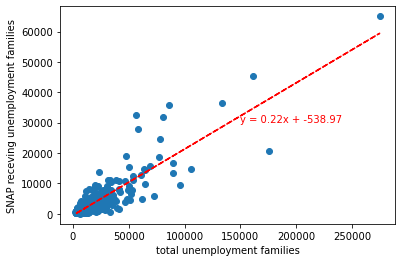

R2 value: 0.7692845159882479


In [32]:
# Create Plot
plt.scatter(df_cleaned["Families with No workers in past year"], df_cleaned["Families receiving food stamps/SNAP with No workers in past year"])
plt.plot(df_cleaned["Families with No workers in past year"], regressValues, "r--")
plt.xlabel("total unemployment families")
plt.ylabel("SNAP receving unemployment families")

# Label plot and annotate the line equation
plt.annotate(lineEQ,(150000,30000),fontsize=10,color="r")

plt.show()

# Print r square value
print(f"R2 value: {rvalue**2}")

In [44]:
df_cleaned['Gap%']=df_cleaned['Gap']/df_cleaned['Families with No workers in past year']*100
df_cleaned['Gap%'].mean()
print(f"GAP % between total and SNAP Receiving  unemployment families:{round(df_cleaned['Gap%'].mean(),2)}%")

GAP % between total and SNAP Receiving  unemployment families:82.52%


In [42]:
df_cleaned['SNAP Receiving%']=df_cleaned["Families receiving food stamps/SNAP with No workers in past year"]/df_cleaned["Families with No workers in past year"]*100


print(f"SNAP Receiving % among unemployment families:{round(df_cleaned['SNAP Receiving%'].mean(),2)}%")

SNAP Receiving % among unemployment families:17.48%
